## Analyze A/B Test Results

This project will assure I have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

For this particular project, I will be working along side quizzes to check the answers to statistical calculations and tests. Certain parts of the project will ask that I answer the quiz questions. Thus, all answers in this project are correct.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure me are on the right track as I work through the project, and I can feel more confident in my final submission meeting the criteria.  As a final check, assure I meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# Import necessary libraries for initial data understanding, visualisations and exploratory data analysis
# Import all libraries
import pandas as pd # converting an entire data table into a NumPy matrix array
import numpy as np # helping to avoid namespace issues
import random
import matplotlib.pyplot as plt # creating or plotting area in a figure, lines  and decorates the plot with labels, etc.
import seaborn as sns # Importing seaborn
import scipy
from scipy import stats
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
sns.set_style('darkgrid')

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Using the dataframe, I will answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# import the data
# Load ab_data. csv file and preview the first 5 rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Printing a concise summary of the data and Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
# Showing data structure of ab_data datasets including number of rows and columns of the dataset
df.shape

(294478, 5)

In [5]:
# Viewing ab_data dataset
df.head(1).columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [6]:
# Structure of Data types of ab_data dataset
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [7]:
# Generating the descriptive statistics of the data
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


c. The number of unique users in the dataset.

In [8]:
# Pandas dataframe.nunique() function return Series with number of distinct observations over requested axis
#  providing the feature to exclude the NaN values from the count of unique numbers
df.user_id.nunique()

290584

d. The proportion of users converted.

In [9]:
# Finding proportion of users converted by using mean
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [10]:
# The number of times new_page and treatment don't match
x = df.query('group != "treatment" and landing_page == "new_page"').count()[0]
y = df.query('group == "treatment" and landing_page != "new_page"').count()[0]
x + y

3893

The number of times the treatment group landed incorrectly on old page plus the number of times the control group landed incorrectly on new page equals 3893. 

f. Do any of the rows have missing values?

In [11]:
# Checking for null values. 
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  I will use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now we will answer the quiz and create a new dataset that meets the specifications from the quiz.  I will store my new dataframe in **df2**.

In [12]:
# Using concatenation technique
df_01 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
df_02 = df[(df.group == 'control') & (df.landing_page == 'old_page')]
frames = [df_01, df_02]
df2 = pd.concat(frames)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` I will use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [14]:
# Printing a concise summary of the data and Information about the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


a. How many unique **user_id**s are in **df2**?

In [15]:
# Making sure unique numbers for user_id column in df2 dataset
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
# I'll start by checking user id for duplicates
sum(df2['user_id'].duplicated())

1

In [17]:
# Checking duplicate userid
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
# Examining details for the repeat user_id
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# Removing the duplicated row
df2.drop(2893, inplace=True)
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [20]:
# Observing a lot of fields those have been removed.
# Printing a concise summary of the data and Information about df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [21]:
# Making sure to look at the specific values of user ids. 
len(df['user_id'].unique())

290584

This can be seen in the table above, there are now 290584 entries, as the entry with index 1899 has been removed. 

`4.` I will use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
# Calculating the mean to get the probability of a person converting since the values are 1 and 0. 
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
# The probability of control group that was converted
p_control = df2.query('group == "control"').converted.mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
# The probability of treetment group that was converted
p_treatment = df2.query('group == "treatment"').converted.mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
# The Probability for landing page values
df2.landing_page.value_counts()/df2.shape[0]

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

In [26]:
# Computing the obsolute difference in the convertion rate between control group and experiment group
obs_diff = p_treatment - p_control

# Displaying observed difference
obs_diff

-0.0015782389853555567

In [ ]:
# Creating sampling distribution of difference in average convertion rates between control group and experiment group
# with boostrapping
diffs = []
# size = df2.shape[0]
for _ in range(10000):
    b_samp = df2.sample(1000, replace=True)
    p_control = b_samp.query('group == "control"').converted.mean()
    p_treatment = b_samp.query('group == "treatment"').converted.mean()
    diffs.append(p_treatment - p_control)

# Converting to numpy array
diffs = np.array(diffs)

# lower and upper bounds to build 95% confidence interval
lower , upper  = np.percentile(diffs,2.5) , np.percentile(diffs,97.5)
# Plotting sampling distribution
plt.hist(diffs);
plt.axvline(x=lower, color='red');
plt.axvline(x=upper, color='red');

The sampling distribution of conversion rate differences for both the treatment and control groups is shown above. We used a 95 percent confidence interval to plot the lower and upper bounds. The observed difference in the mean conversion rate for both the treatment and control groups is -0.001578, showing that conversion rates for the treatment group/new page are higher than those for the control group/old page. The sampling distribution of difference in means generated by bootstrapping, however, contradicts this. The trust interval does not include all values that are less than 0.

e. I will consider my results from a. through d. above, and explain below whether I think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** It is obvious that the old page(control) has a significantly higher number of people who converted than the new page(treatment), related to the overall number of users who converted.
The conversion rate (%) in the old page(control)is 12.04 percent, while it is 11.88 percent in the old page(treatment).
Since the difference is so slight, I don't think there is a significant enough difference for a specific page to convert more visitors. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, I will consider the need to make the decision just based on all the data provided.  If I want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should the null and alternative hypotheses be? I can state my hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

-  **Hypothesis**

  $$H_0: p_{new} \leq p_{old}$$

  $$H_1: p_{new} > p_{old}$$

-  **In other words**

  $$H_0: p_{new} - p_{old} \leq 0$$

  $$H_1: p_{new} - p_{old} > 0$$

**Answer:** 
The old page has a greater probability of converting users if the p-value is less than 5%, which is the null hypothesis.
Alternative hypothesis: the new page has a better probability of converting users if the p-value is equal to or greater than 5%. 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Using a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

I will use the cells below  to perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [28]:
# Identifying the mean of the converted in new page
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [29]:
# Identifying the mean of the converted in old page
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [30]:
# Calculating the total number of new page lands
n_new = df2.landing_page.value_counts()[0]
n_new

145310

d. What is $n_{old}$?

In [31]:
# Calculating the total number of old page lands
n_old = df2.landing_page.value_counts()[1]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  We will store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
# Using random.choice and p new, generate new page landings at random. 
new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
new_page_converted.mean()

0.880834078865873

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
# Using random.choice and p new, generate old page landings at random.
old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
old_page_converted.mean()

0.881272629651555

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
# generating values from part (e) and (f). 
new_page_converted.mean() - old_page_converted.mean()

-0.00043855078568200145

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [35]:
# Making empty lists for the bs values
p_diffs, bs_new_means, bs_old_means = [], [], []

# Using a loop function to repeat the process described above 
# as well to append to the empty lists at the top. 
for _ in range (10000):
    bs_new = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
    bs_old = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
    bs_new_means.append(bs_new.mean())
    bs_old_means.append(bs_old.mean())
    p_diffs.append(bs_new.mean() - bs_old.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what I expected?

**Answer:** We can see what we expect from the shown histogram below. A normal distribution is encompassed by the bell-shaped curve.
It illustrates the Central Limit Theorm, which notes that when a population is large enough, the mean of all samples from the same population will be exactly proportional to the population's mean.
. 

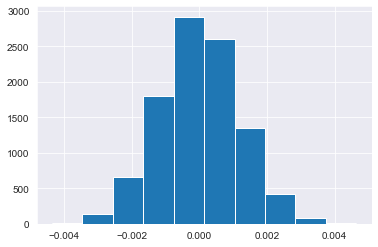

In [36]:
# Plotting a histogram after converting p_diffs to an array. 
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

P-diffs have a normal distribution, which is essentially what I predicted since it reflects the central limit theorem (CLT), which implies that while the sample size is large enough, the sample distribution of the mean will be distributed normally. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
# Subtracting the average old page transforms from the new page converts to get the actual diff.
actual_diff = df2.query('landing_page == "new_page"').converted.mean() - df2.query('landing_page == "old_page"').converted.mean()
actual_diff

-0.0015782389853555567

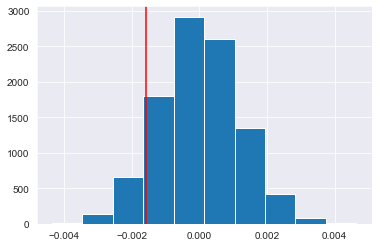

In [38]:
plt.hist(p_diffs);
plt.axvline(actual_diff, color = 'red');

In [39]:
# Calculating the p-value. 
p_val = (p_diffs > actual_diff).mean()
p_val

0.9057

k. In my own objective, I will describe what I just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** If the null hypothesis is true, the possibility of getting the observed statistic or a more excrement value is p value. The difference in average conversion rates between the treatment and control groups is our observed statistic in ab data.csv. The observed statistic in our case is -0.001578. The area on the distribution that falls to the right of the observed statistic when plotted on the sampling distribution of difference in means created under the null hypothesis. In this case, the p value is 0.9051, which means that 90.51 percent of the null hypothesis values are greater than the observed statistic. In this case, the Type-1 error rate is 5% .$$p = 0.9087$$$$\alpha = 0.05$$
Since p-value is greater than this, there is sufficient reason to conclude that we should not reject the null hypothesis.
On average, an old page converts at a higher rate or at the same rate as a new page. 



The actual versus observed difference in means of converted old page and new page are really what we measured. This implies that the mean randomly transformed values for the observed discrepancy, which is recorded in p_diffs, were selected at random.The real difference was calculated using the ab_data.csv dataset. The p-value is the variance that we determined. Our p-value is higher than the average.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
# statsmodels supports specifying models using pandas DataFrames.
# importing the required packages.
import statsmodels.api as sm

# Identifying the number  of pages that have been transformed in both the old and new pages. 
convert_old = df2.query('landing_page == "old_page" & converted == "1"').count()[0]
convert_new = df2.query('landing_page == "new_page" & converted == "1"').count()[0]
# Identifying the total number of users who visited the old and new pages.
n_old = df2.landing_page.value_counts()[1]
n_new = df2.landing_page.value_counts()[0]

# Presenting the variables we defined earlier. 
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
# Identifying the z-score and p-value by using the built-in functions. 
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print(z_score)
print(p_value)

1.3109241984234394
0.18988337448195103


In [42]:
# importing the required packages
from scipy.stats import norm
# This explains hereby to the significance of the z-score.
norm.cdf(z_score)

0.9050583127590245

In [43]:
# At a 95% confidence interval, this gives hereby to the critical value. 
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** The null hypothesis is being tested with a 95% confidence standard. The significant z score value is now 1.9599. The distribution of data in ab data.csv has a z score of 1.2616, which is less than the important z score. The computed p_value is also 0.8964, which is higher than the Type-1 error threshold of 0.05. As a result, we are unable to dismiss the null hypothesis. 


I would like to emphasize hereby that the z-score and p-value have been reflected to the same statement as part j and k. This p-value is exceptionally high, implying that our statistic is most definitely from the null hypothesis. As a result, we fail to reject the null hypothesis and wrap up that the new page is not better to the old one. 

Since the z-score of 1.311 is less than the critical value of 1.960 at 95 percent confidence interval, it falls within the 95 percent confidence interval range. The null hypothesis is failed to reject; the old page migrated more users than the new page. Again, our p-value(0.189) varies from what we measured in sections j and k(0.898), which is to be taken for granted that the null and alternative hypotheses suggested that p_new and p_old are the same and that there is no difference in transforming users from the old to the new page. Nevertheless, this is not the issue since, due to the lower p-value, the old page transforms more users than the new page (0.189). 


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, I will see that the result I acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression is appropriate for this case?

**Answer:** Logistic regression has been implemented because of this scenario and **Logistic Regression Model** is used to examine the association of (categorical or continuous) independent variable(s) with one dependent variable.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, I will first need to create a column for the intercept, and create a dummy variable column for which page each user received.  I will add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
# Making sure of the first rows of the df2 after dummies
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [45]:
#  For the intercept, this would be equivalent to "intercept equal to 1".
df2['intercept'] = 1

df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. I will use **statsmodels** to import my regression model by instantiating the model, and fit the model using the two columns I created in part **b.** to predict whether or not an individual converts.

In [46]:
# Applying logistic regression model which is fit and display the results
import statsmodels.api as sm
logitmod = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])

d. Provided below is a summary of my model and I will use my results to answer the following questions.

In [47]:
results = logitmod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        01:04:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [48]:
df3 = df2.rename(columns={'treatment': 'ab_page'})
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


In [49]:
from scipy import stats
stats.chisqprob = lambda chisq, df3: stats.chi2.sf(chisq, df3)

df3['intercept'] = 1

lm = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        01:04:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**Summary:** When all other variables are kept constant, the number of converted is 1.015 times higher than the number of non-converted.
This ensures that both the old and new pages have the same chance of converting users. We must not presume that the new page is preferable  and better to the old  page. 

e. What is the p-value associated with **ab_page**? Why does it differ from the value found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with the regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- **Hypothesis**

  $$H_0: p_{new} - p_{old} = 0$$

  $$H_1: p_{new} - p_{old} \neq 0$$

In [50]:
# Just checking some numbers
print('According to linear regression:')
print('conversion rate of "control page":\t\t', np.exp(-1.9888))
print('change of rate with implementing "new page":\t', np.exp(-0.0150) - 1) 
print('\nFurther checks')
print('Change in rate according to data:\t\t', convert_new * n_old / (convert_old * n_new) - 1) 
print('Approximation of previous p-value:\t\t', np.exp(-0.190/2))

According to linear regression:
conversion rate of "control page":		 0.13685955841614492
change of rate with implementing "new page":	 -0.014888060396937353

Further checks
Change in rate according to data:		 -0.013109788458948168
Approximation of previous p-value:		 0.9093729344682314


The associated p-value for ab_page is 0.19.
It's greater than 0.05. As a result, the coefficient is unimportant.
Alternative hypothesis from part II: the old page's conversion rate is lower than the new page's conversion rate. This means that the test is one-tailed.
The alternative hypothesis can be stated as follows in Part III:
(1) The landing page form affects (positively or negatively) the conversion rate, or (2) the old page's conversion rate differs from 
the new page's conversion rate. A two-tailed test is expected. 
In both cases, the findings are insufficient to support the alternative hypothesis.

The p-value is significantly different. The p-value in part II is 0.91.
This may be due to the fact that regression model experiments (not A/B tests) presume an intercept, as well as variations in one- and two-tailed testing. 


**Answer:** Since our null and alternative hypthesis models assumed that the old and new pages had an equal chance of converting users, the p-value observed in the logistic regression model(0.19) differs from what we identified in sections j and k. This is not the scenario with the logistic regression model. Furthermore, the Logistic Regression is a two-tailed test, while the computation in Part II is a one-tailed test. 

f. Now, consider other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into the regression model.  Are there any disadvantages to adding additional terms into the regression model?

**Answer:** Some other attribute that impacts whether or not anyone converts is their age. In comparison to a teenager, who may desire more images and a more simplistic theme, older users may desire more details on the pages. Confidence intervals can increase or decrease as more parameters are added to the regression model. Multiple variables in a logistic regression model have the downside of reducing the strength of measurement.  

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. I will need to read in the **countries.csv** dataset and merge together the datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  I will need to create dummy variables for these country columns - **Hint: We will need two columns for the three dummy varaibles.**

**Answer:** The conversion rate is unaffected by the user's location.
This can be measured by calculating the conversion rates of each nation.
CA: 0.1153 US: 0.1195 UK: 0.1206
They're all pretty much the same. We fail to reject the null hypothesis 

In [51]:
# import the data
# Load countries.csv. csv file 
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [52]:
# import the data
# Load countries.csv. csv file 
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')

In [53]:
# preview the first 5 rows
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [54]:
df_new.head()
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [55]:
# mean of conversion rate
df_new.ab_page.mean()

0.5000619442226688

In [56]:
# Counting altogether respectively
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [57]:
# mean conversion rate by country
df_new.groupby(['country'], as_index=False).mean()

,country,converted,intercept,control,ab_page
0,CA,0.115318,1.0,0.496448,0.503552
1,UK,0.120594,1.0,0.501753,0.498247
2,US,0.119547,1.0,0.499541,0.500459


In [58]:
# mean conversion rate by landing_page 
df_new.groupby(['ab_page'], as_index=False).mean()

,ab_page,converted,intercept,control
0,0,0.120386,1.0,1
1,1,0.118808,1.0,0


In [59]:
# Creating the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,0,1,0,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,0,1,0,0,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,0,1,0,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,0,1,0,0,1


In [60]:
# Fit My Logistic Regression Model And Obtain the Results
# For the intercept, this would be equivalent to "intercept equal to 1".
df_new['intercept'] = 1

logitmod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
results = logitmod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 May 2021   Pseudo R-squ.:               1.521e-05
Time:                        01:04:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [61]:
# Fit My Linear Model And Obtain the Results

df_new['intercept'] = 1

lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        01:04:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

The country has no influence on conversion.
Both the UK and the US have p values that are not statistically significant, and their confidence intervals include 0. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [62]:
# Checking for potential interactions (whether the effect of the landing page varies by country) by calculating 
# the average conversion rate by country and landing page. 

df_new.groupby(['country','ab_page'], as_index=False).mean()

,country,ab_page,converted,intercept,control,CA,UK,US
0,CA,0,0.118783,1.0,1,1,0,0
1,CA,1,0.111902,1.0,0,1,0,0
2,UK,0,0.120022,1.0,1,0,1,0
3,UK,1,0.121171,1.0,0,0,1,0
4,US,0,0.120630,1.0,1,0,0,1
5,US,1,0.118466,1.0,0,0,0,1


In [63]:
df_new.head()
df_new['interaction_uk_ab_page'] = df_new.US *df_new.ab_page
df_new['interaction_us_ab_page'] = df_new.CA *df_new.ab_page

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US,interaction_uk_ab_page,interaction_us_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0


In [64]:
df_new['intercept'] = 1

lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','interaction_uk_ab_page','US','interaction_us_ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        01:04:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page                    0.0108      0.023      0.475      0.635      -0.034       0.056
UK                         0.0118      0.040      0.296      0.767      -0.066       0.090
interaction_uk_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
US                         0.0175      0.038      0.465      0.642      -0.056       0.091
interaction_us_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==========================================================================================
"""

In [65]:
df_new['intercept'] = 1

logitmod2 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','interaction_uk_ab_page','US','interaction_us_ab_page']])
results2 = logitmod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        01:04:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page                    0.0108      0.023      0.475      0.635      -0.034       0.056
UK                         0.0118      0.040      0.296      0.767      -0.066       0.090
interaction_uk_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
US                         0.0175      0.038      0.465      0.642      -0.056       0.091
interaction_us_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==========================================================================================
"""

In [66]:
np.exp(results.params)

intercept                 0.134794
ab_page                   1.010893
UK                        1.011854
interaction_uk_ab_page    0.969090
US                        1.017682
interaction_us_ab_page    0.924703
dtype: float64

In [67]:
1/np.exp(-0.0149)

1.0150115583846535

In [68]:
1/_

0.00010001000100010001

In [69]:
df.groupby('group').mean()['converted']

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

**Summary:** We have a fair probability of the ab page transforming users in each country based on the odds ratio of the interaction between country and ab page (1.017, 1.012, 1.00).
As a result, the null hypothesis is not rejected; the new page does not transform more than the old page.  

<a id='conclusions'></a>
## Conclusions

The findings show that the new and old pages have roughly equivalent chances of converting users, based on the statistical tests we conducted, the Z-test, logistic regression model, and actual difference identified.
The null hypothesis is not rejected.
I advise the e-commerce business to retain the old page.
This would save you time and money by avoiding the need to establish a new website. 

<a id='conclusions'></a>


> Congratulations on completing the project!



## Gather Submission Materials

> Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the File -> Download as -> HTML (.html) menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using pip install <module_name> (don't include the "<" or ">" or any words following a period in the module name).

> You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a readme.txt file documenting your sources.

### Submit the Project

> When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

> It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

## Sources.


- Pandas documentation <br>

- Kaggle guide<br>

- Stack Overflow<br>

- w3schools<br>

- Guru99<br>

- Tutorialspoint<br>

- Realpython<br>

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1